In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.12.2 (main, Mar 12 2024, 08:01:18) [GCC 12.2.0]
Numpy version: 2.1.0
Matplotlib version: 3.9.2


Задача **1**

Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

* Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
* Первый график должен быть красного цвета и нарисован штрихпунктирной линией
* Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией


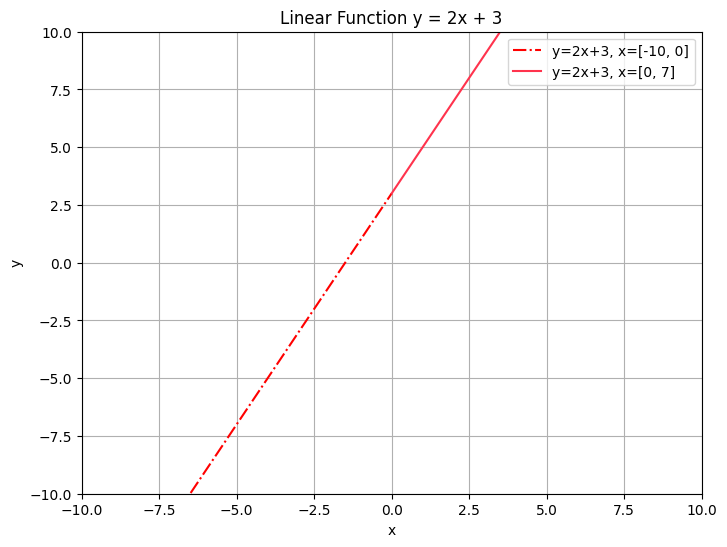

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return 2 * x + 3
x1 = np.linspace(-10, 0, 100)
y1 = f(x1)
x2 = np.linspace(0, 7, 100)
y2 = f(x2)
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, color='red', linestyle='-.', label='y=2x+3, x=[-10, 0]')
plt.plot(x2, y2, color=(1.0, 0.2, 0.3), linestyle='-', label='y=2x+3, x=[0, 7]')
plt.xlim(-10, 10)
plt.ylim(-10, 10)а
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Function y = 2x + 3')
plt.legend()
plt.grid()
plt.show()


Задача **2**

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

* По оси X - возврат пассажира (Age)
* По оси Y - стоимость билета (Fare)
* Для выживших пассажиров используется маркер зеленый круг (Survived)
* Для не выживших пассажиров используется маркер красный крест (Survived)
* График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

Saving titanic.csv to titanic (1).csv


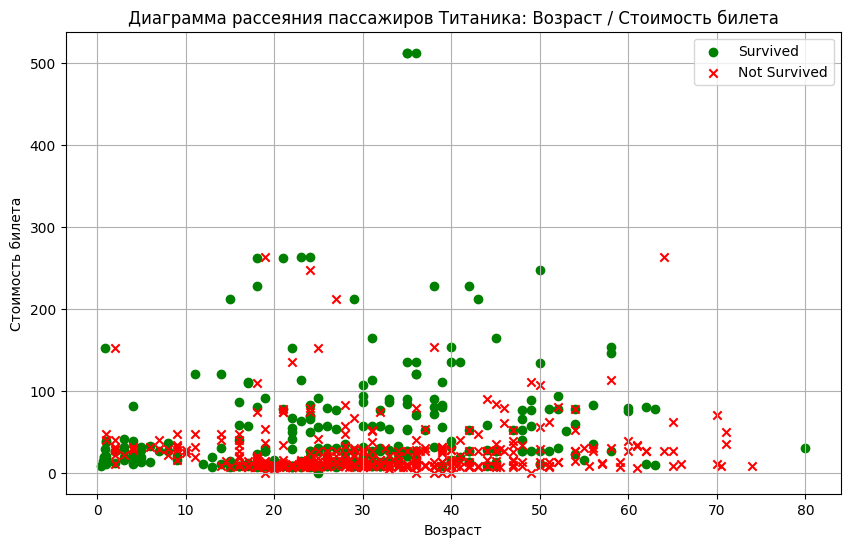

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

titanic_df = pd.read_csv("titanic.csv")

titanic_df = titanic_df.dropna(subset=['Age', 'Fare'])

survived = titanic_df[titanic_df['Survived'] == 1]
not_survived = titanic_df[titanic_df['Survived'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(survived['Age'], survived['Fare'], color='green', marker='o', label='Survived')
plt.scatter(not_survived['Age'], not_survived['Fare'], color='red', marker='x', label='Not Survived')

plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.title('Диаграмма рассеяния пассажиров Титаника: Возраст / Стоимость билета')
plt.legend()
plt.grid()
plt.show()


Задача **3**

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы.
Для набора данных [iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

* Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
* Цвет маркеров должен зависеть от вида ирисов (iris.target)
* Графики должны иметь подписи к осям, легенду и общий заголовок

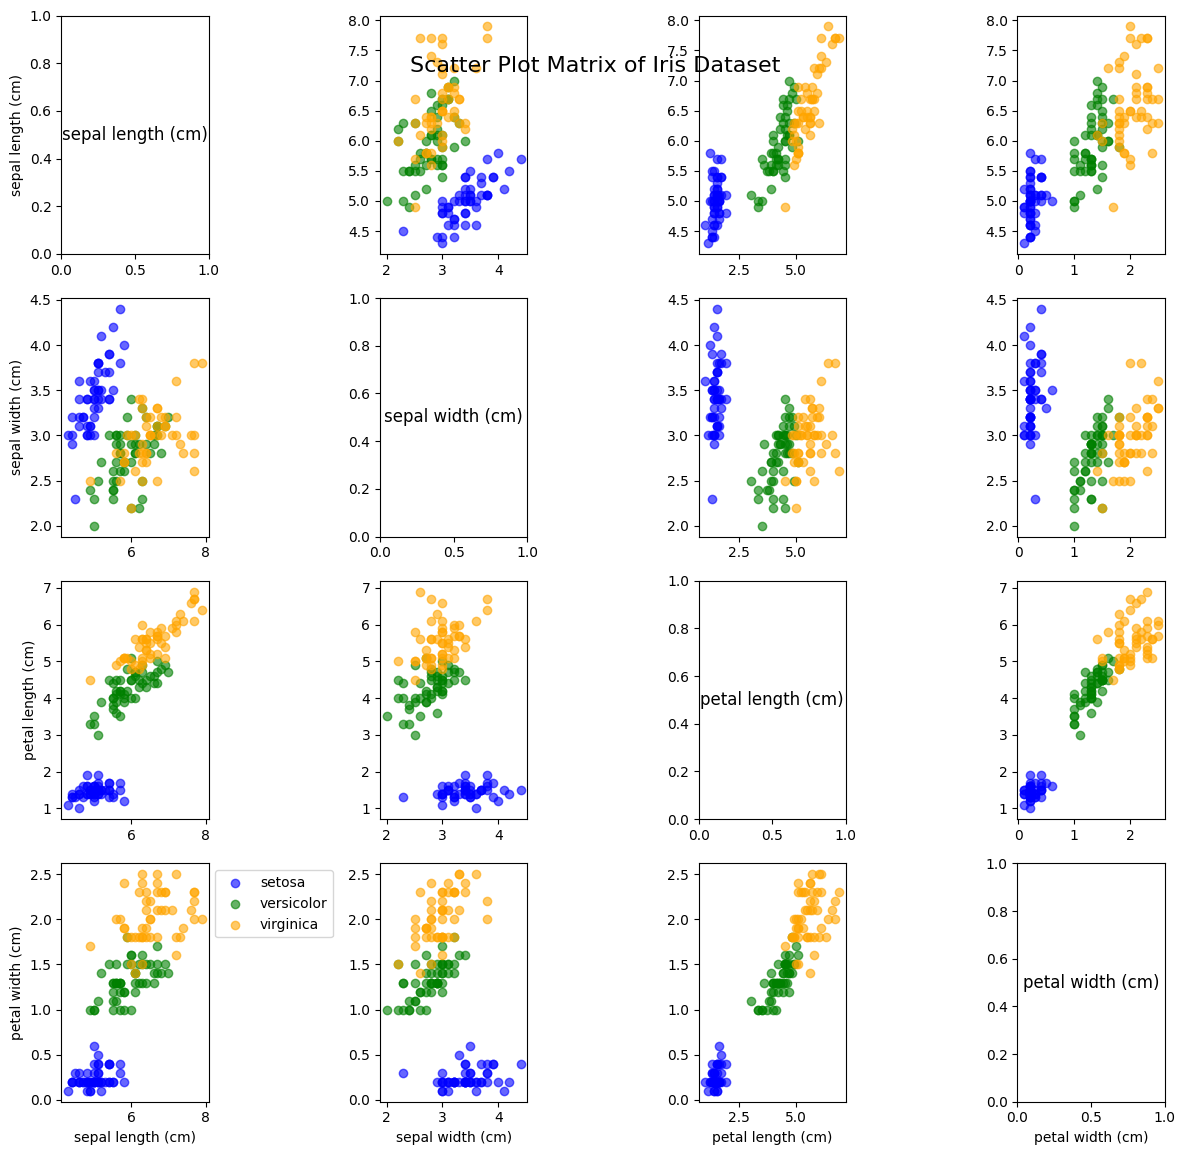

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import itertools
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
features = iris.feature_names
species_colors = {0: 'blue', 1: 'green', 2: 'orange'}
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Scatter Plot Matrix of Iris Dataset', y=0.92, fontsize=16)
for i, j in itertools.product(range(4), range(4)):
    if i != j:
        for species, color in species_colors.items():
            subset = iris_df[iris_df['species'] == species]
            axes[i, j].scatter(subset[features[j]], subset[features[i]], color=color, label=iris.target_names[species], alpha=0.6)
        if i == 3 and j == 0:
            axes[i, j].legend(loc='upper left', bbox_to_anchor=(1, 1))
    else:
        axes[i, j].text(0.5, 0.5, features[i], ha='center', va='center', fontsize=12)
for ax, feature in zip(axes[3, :], features):
    ax.set_xlabel(feature)
for ax, feature in zip(axes[:, 0], features):
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()


Задача **4**

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

* Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
* Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
* График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

Saving titanic.csv to titanic (2).csv


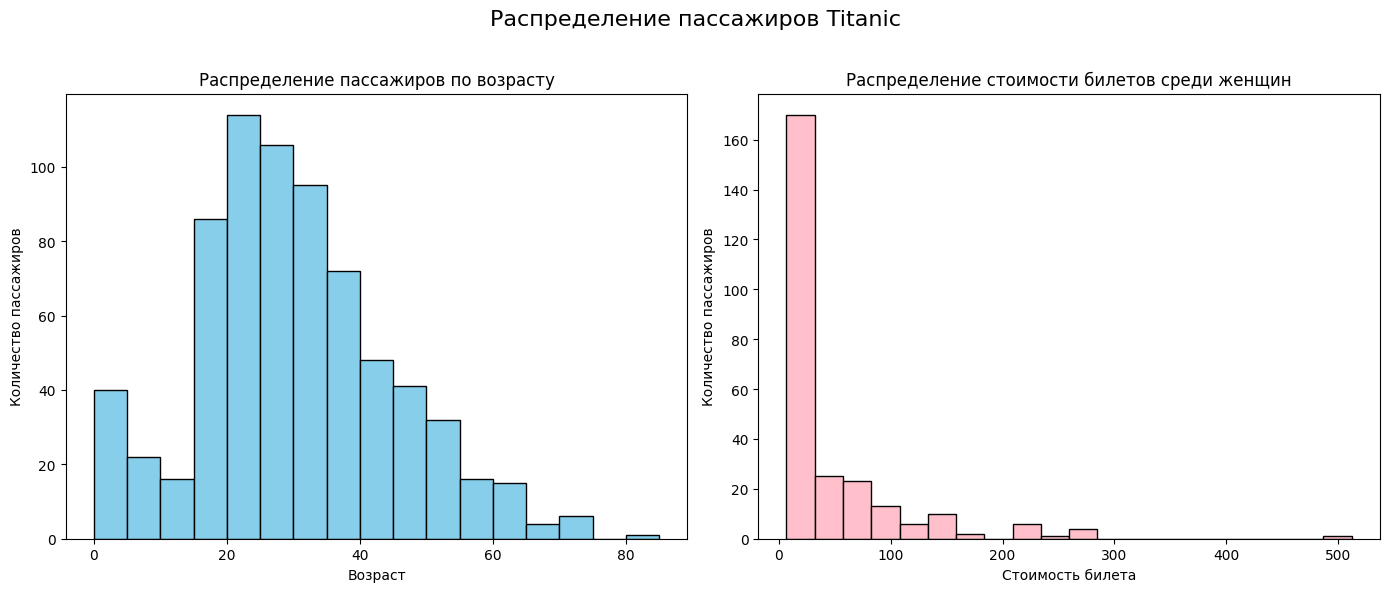

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
titanic_df = pd.read_csv("titanic.csv")
titanic_df = titanic_df.dropna(subset=['Age', 'Fare'])
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Распределение пассажиров Titanic', fontsize=16)
axes[0].hist(titanic_df['Age'], bins=range(0, 90, 5), color='skyblue', edgecolor='black')
axes[0].set_title('Распределение пассажиров по возрасту')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество пассажиров')
female_fare = titanic_df[titanic_df['Sex'] == 'female']['Fare']
axes[1].hist(female_fare, bins=20, color='pink', edgecolor='black')
axes[1].set_title('Распределение стоимости билетов среди женщин')
axes[1].set_xlabel('Стоимость билета')
axes[1].set_ylabel('Количество пассажиров')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Задача **5**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - средняя стоимость за проезд для данного класса (Fare)
* График должен иметь подписи к осям, легенду и заголовок

Saving titanic.csv to titanic (4).csv


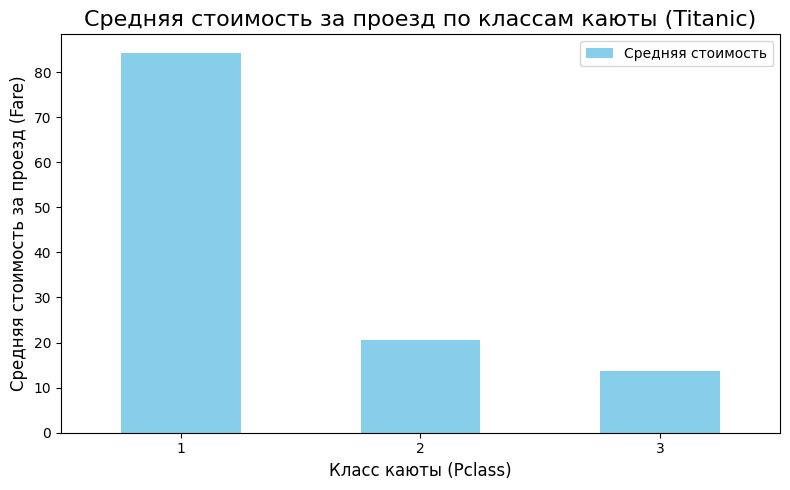

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
uploaded = files.upload()
data = pd.read_csv("titanic.csv")
average_fare = data.groupby('Pclass')['Fare'].mean()
plt.figure(figsize=(8, 5))
average_fare.plot(kind='bar', color='skyblue')
plt.title('Средняя стоимость за проезд по классам каюты (Titanic)', fontsize=16)
plt.xlabel('Класс каюты (Pclass)', fontsize=12)
plt.ylabel('Средняя стоимость за проезд (Fare)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Средняя стоимость'], loc='upper right')
plt.tight_layout()
plt.show()


Задача **6**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - количество пассажиров с разбивкой по полу (Sex)
* График должен иметь подписи к осям, легенду и заголовок

Saving titanic.csv to titanic (5).csv


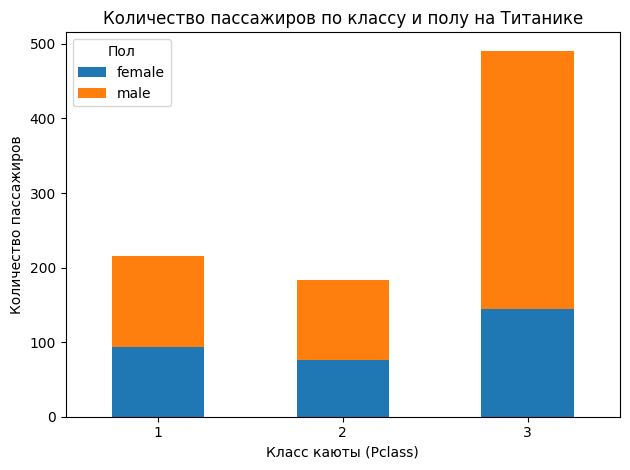

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
uploaded = files.upload()
data = pd.read_csv("titanic.csv")
grouped_data = data.groupby(['Pclass', 'Sex']).size().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.title('Количество пассажиров по классу и полу на Титанике')
plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Количество пассажиров')
plt.legend(title='Пол')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Задача **7**

Для набора данных iris постройте круговую диаграмму

* Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
* Сектор с максимальной долей долен быть выдвинут
* График должен иметь подписи к осям, легенду и заголовок

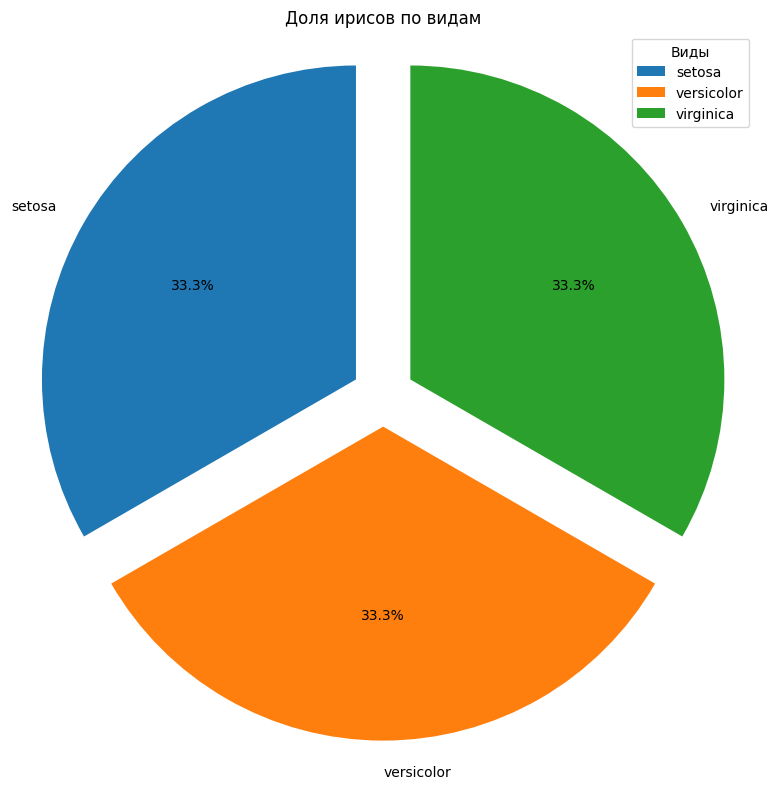

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
species_counts = iris_df['species'].value_counts()
labels = iris.target_names
sizes = species_counts.values
explode = [0.1 if size == max(sizes) else 0 for size in sizes]
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Доля ирисов по видам')
plt.axis('equal')
plt.legend(title='Виды')
plt.tight_layout()
plt.show()


Задача **8**

Использую библиотеку [Seaborn](https://seaborn.pydata.org/) постройте гистограмму для возраста пассажиров "Титаника"

Saving titanic.csv to titanic (9).csv


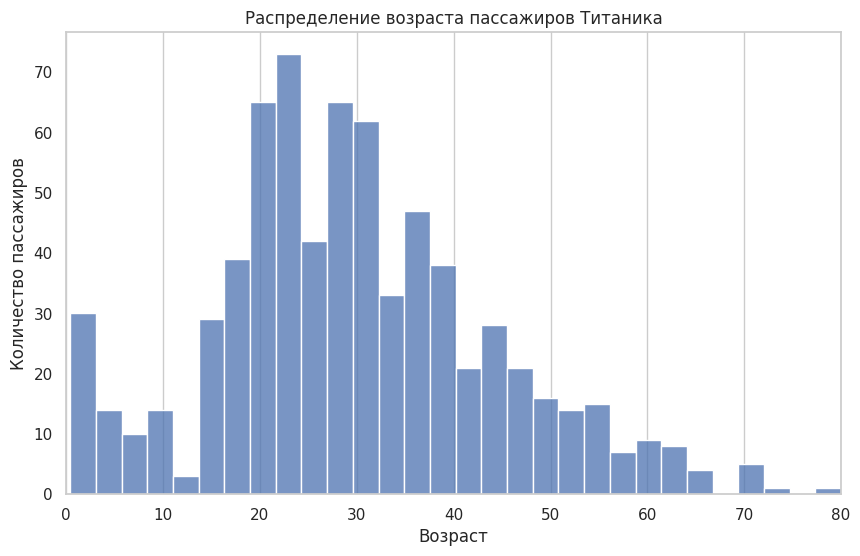

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
uploaded = files.upload()
data = pd.read_csv("titanic.csv")
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=False)
plt.title('Распределение возраста пассажиров Титаника')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.xlim(0, data['Age'].max())
plt.grid(axis='y')
plt.show()


## Вопросы


1. Для чего используется диаграмма рассеяния?

Диаграмма рассеяния используется для визуализации взаимосвязи между двумя количественными переменными. Она позволяет увидеть, как одно значение изменяется относительно другого, а также выявить возможные корреляции или паттерны.

2. Что такое гистограмма, чем он отличается от столбчатой диаграммы?

Гистограмма отображает распределение количественных данных, группируя значения в интервалы (бины) и показывая частоту (количество) в каждом интервале. Столбчатая диаграмма, в отличие от этого, используется для отображения категориальных данных, где каждый столбец представляет собой отдельную категорию.

3. Как задать цвет линии в линейном графике Matplotlib?

Цвет линии в линейном графике можно задать с помощью параметра color в функции plot(), например: plt.plot(x, y, color='red').

4. Чем класс plt.Figure отличается от объекта  plt.Axes?

plt.Figure представляет собой всю область рисования, включая все графики и элементы, а plt.Axes — это отдельная область в фигуре, где рисуются графики. Один объект Figure может содержать несколько объектов Axes.

5. Matplotlib не позволяет управлять типом маркера scatter графика. Да или нет?

Нет, Matplotlib позволяет управлять типом маркера в scatter графиках с помощью параметра marker, например: plt.scatter(x, y, marker='o').

6. Matplotlib единственная библиотека для построения графиков в Python. Да или нет?

Нет, Matplotlib не является единственной библиотекой для построения графиков. Существуют другие библиотеки, такие как Seaborn, Plotly, Bokeh и Altair.

7. Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?

Нет, Matplotlib позволяет сохранять графики в файлы с помощью функции savefig(), например: plt.savefig('figure.png').

8. В наборе данных iris представлены 4 вида ирисов. Да или нет?

Нет, в наборе данных Iris представлены 3 вида ирисов: Setosa, Versicolor и Virginica.

9. Для всех пассажиров "Титаника" указан возраст. Да или нет?

Нет, в наборе данных Titanic не для всех пассажиров указан возраст. В некоторых записях возраст может отсутствовать.

10. Как на одном холсте может располагаться не более 16 диаграмм, это обусловлено тем что размер диаграммы нельзя изменить и более мелкие графики попросту не будут видны.

Это утверждение не совсем верно. На одном холсте может быть размещено больше диаграмм, но их размер и видимость зависят от того, как вы организуете сетку и размеры графиков. Вы можете настроить размеры и размещение, чтобы отображать больше графиков.